In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D #To visualise in 3D
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

df = pd.read_csv("data_3dprinter.csv")
df.rename(columns={"tension_strenght": "tensile_strength"}, inplace=True)

if 'infill_pattern' in df.columns:
    df['infill_pattern_encoded'] = df['infill_pattern'].map({'grid': 0, 'honeycomb': 1})
if 'material' in df.columns:
    df['material_encoded'] = df['material'].map({'abs': 0, 'pla': 1})

df.drop(columns=['material', 'infill_pattern'], inplace=True)


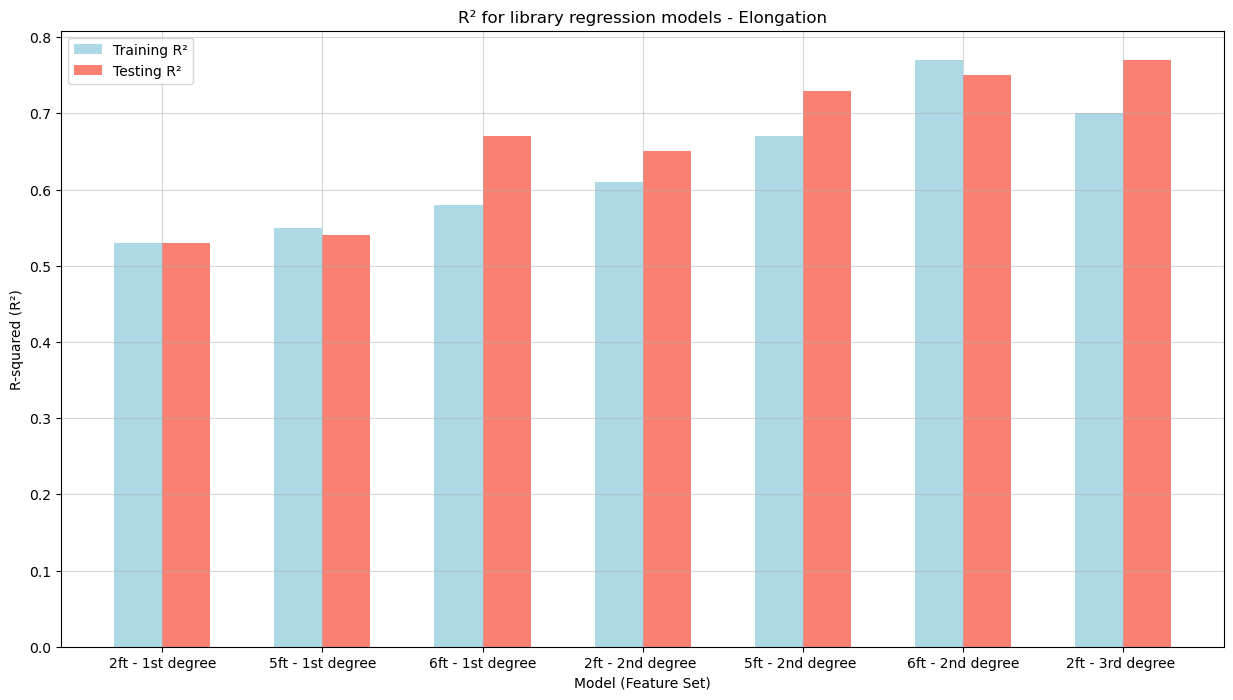

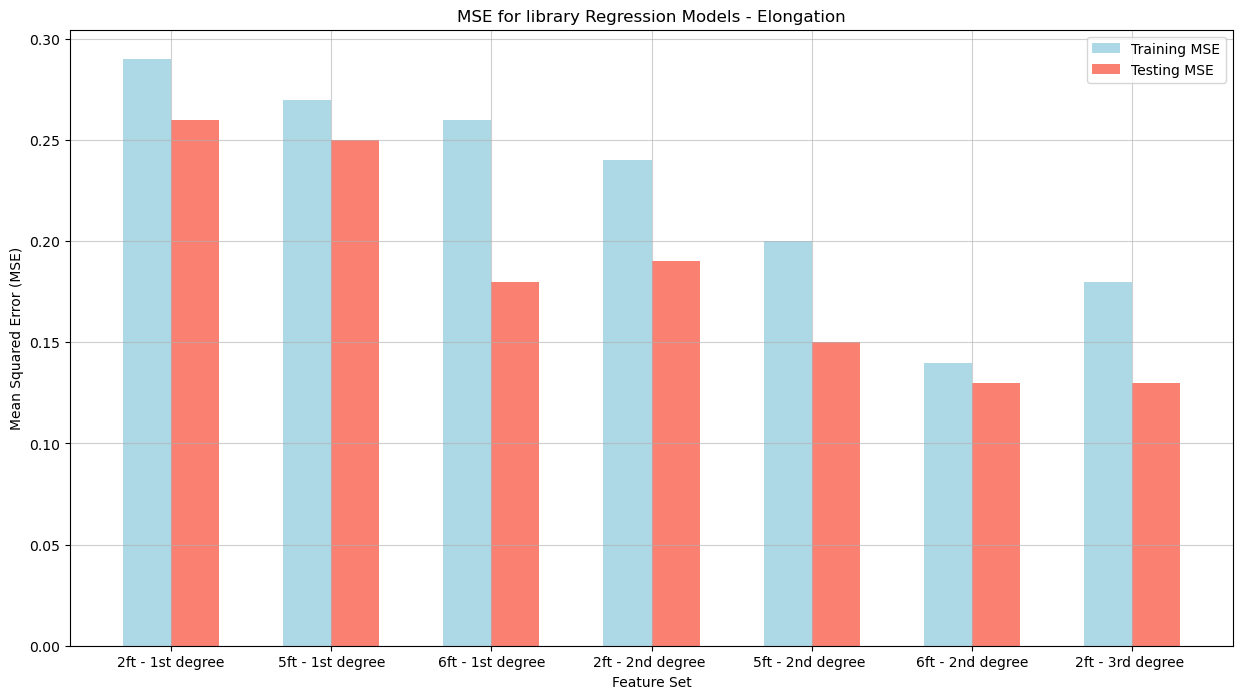

In [15]:
#Correation values for all the models 
r2_data = {
    "Model": [ "2ft - 1st degree", "5ft - 1st degree" , "6ft - 1st degree",  "2ft - 2nd degree ","5ft - 2nd degree ",  "6ft - 2nd degree", "2ft - 3rd degree "],
    "Degree": [ 2, 2, 2, 2, 2,2, 2  ],
    "Train R2": [ 0.53, 0.55, 0.58,0.61, 0.67,0.77, 0.70],  
    "Test R2":  [ 0.53, 0.54, 0.67, 0.65, 0.73,0.75, 0.77] } 

r2_df = pd.DataFrame(r2_data)#Making the above in[uted R^2 values as dataframes

x_labels = r2_df["Model"].values
x = np.arange(len(x_labels))
width = 0.30

plt.figure(figsize=(15,8))
plt.bar(x - width/2, r2_df["Train R2"], width, label='Training R²', color='lightblue')
plt.bar(x + width/2, r2_df["Test R2"], width, label='Testing R²', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Model (Feature Set)")
plt.ylabel("R-squared (R²)")
plt.title("R² for library regression models - Elongation")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.5)
plt.show()
#MSE Values bar chart comparison
data = {
    "Model": [ "2ft - 1st degree", "5ft - 1st degree" , "6ft - 1st degree",  "2ft - 2nd degree ","5ft - 2nd degree ",  "6ft - 2nd degree", "2ft - 3rd degree "],
    "Degree": [ 2, 2, 2, 2, 2,2, 2 ],
    "Train MSE": [0.29, 0.27, 0.26, 0.24, 0.2, 0.14, 0.18],
    "Test MSE": [0.26, 0.25, 0.18, 0.19, 0.15, 0.13, 0.13] } 

mse_df = pd.DataFrame(data)

# Ploting
x_labels = mse_df["Model"].values
x = np.arange(len(x_labels))
width = 0.30

plt.figure(figsize=(15, 8))
plt.bar(x - width/2, mse_df["Train MSE"], width, label='Training MSE', color='lightblue')
plt.bar(x + width/2, mse_df["Test MSE"], width, label='Testing MSE', color='salmon')

plt.xticks(x, x_labels)
plt.xlabel("Feature Set")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("MSE for library Regression Models - Elongation")
plt.legend()
plt.grid(True, linestyle='-', alpha=0.6)
plt.show()

* 1st Model and 2nd Models: 2 features linear and - 2nd Model 5 features Linear - Underfitting - 
The models show underfitting as the R^2 values are low symbolyssing moderately low correlation between the data aand the predictions by the model. The MSE values are also high, therefore the model makes a lot of errors, and not coping with the complexity of the data. 

* 3rd Model 6 features Linear regression - Underfitting, but Slightly Better - 
The increasing complexity of the model by addition of an extra feature created a slight improvementof the model, and the correlation R^2 value has increased. However the gap between the training and testing sets is still large for both R^2 and MSE implying that the model is underfitting and does not represent the complexity of data well. 

* 4th Model and 5th Model: 2 features 2nd degree polynomial regression and - 4 features 2nd Degree Polynomial Regression - Better fit, slight Underfit  -  
The models show higher correlation for both of the models, implying that the 2nd degree polynomial is suitable model for this data, and adding more features improves the precision and consistency of the model, improving its perfomance of capturing more complex data. However, the underfit is still present as the MSE values quite differe for both training and testing sets of the data 

* 6th Model 6features 2nd degree Polynomial Regression Model - Best fit, no overfitting - 
The model shows consistently high values of correlation R^2, for both training and tsting sets. With smaller MSE for them. The difference between the MSE and R^2 between the training and testing sets is relatively low, this is a sign that the model is a good fit for the data. Hence it is the best way to model Elongation Target.

* 7th Model 3rd Degree 2 features - Overfit. 
The model shows signs of overfit, as the difference between the R^2 values andthe MSE paameters for the training and testing sets begin to increase, this indicates that the increased complexity of the model only worsened the perfomance of it, and the 2nd gegree model is a better fit. By this reason the 3rd degree no lbrary implementation does not contain the 3rd degree model, as it is an overfit and not good fit for the target elongtion. 


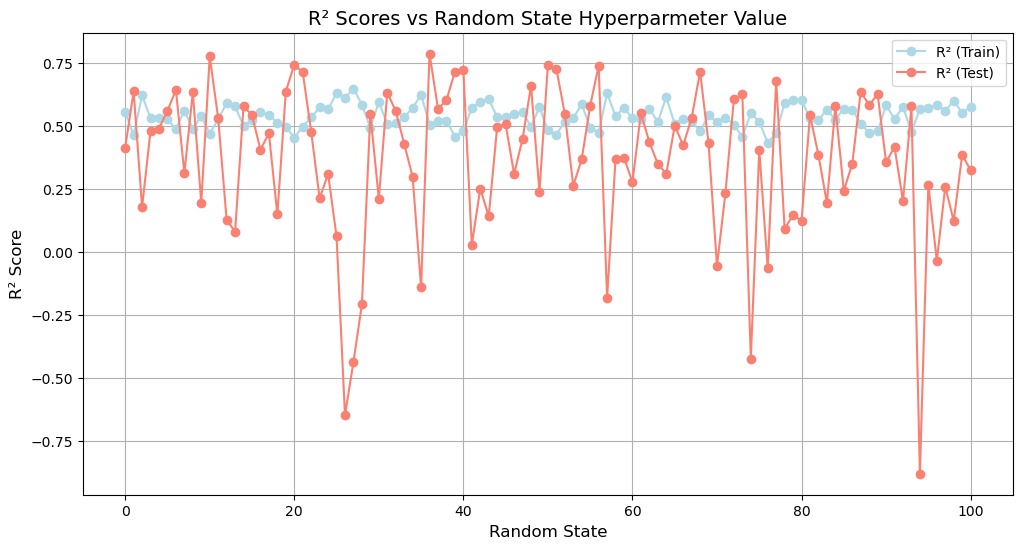

In [16]:
features = ['nozzle_temperature', 'layer_height']
X = df[features]
y = df["elongation"]

results = []#storing results results

for seed in range(0, 101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    results.append({
        'Random State': seed,
        'R² (Train)': r2_train,
        'R² (Test)': r2_test})

#Creating a DataFrame
results_df = pd.DataFrame(results)
#Plotting
plt.figure(figsize=(12, 6))
plt.plot(results_df['Random State'], results_df['R² (Train)'], label='R² (Train)', color = 'lightblue', marker = 'o')
plt.plot(results_df['Random State'], results_df['R² (Test)'], label='R² (Test)', color = 'salmon', marker = 'o')
plt.title("R² Scores vs Random State Hyperparmeter Value", fontsize=14)
plt.xlabel("Random State", fontsize=12)
plt.ylabel("R² Score", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


Hyperparameter random state is selected to optimise the correlation R^2 forboth test set and random set. Possible random state parameters were plotted on the line plot above. The random state of 11 was selected for elongation modelling as it ensures the highest correlation values for both test and training set.

Linear Regression with 2 Features - Elongation

Training Set:
Mean Absolute Error (MAE): 0.43
Mean Squared Error (MSE): 0.29
Root Mean Squared Error (RMSE) : 0.54
R-squared (R²): 0.53

Testing Set:
Mean Absolute Error (MAE) : 0.41
Mean Squared Error (MSE) : 0.26
Root Mean Squared Error (RMSE): 0.51
R-squared (R²) : 0.53


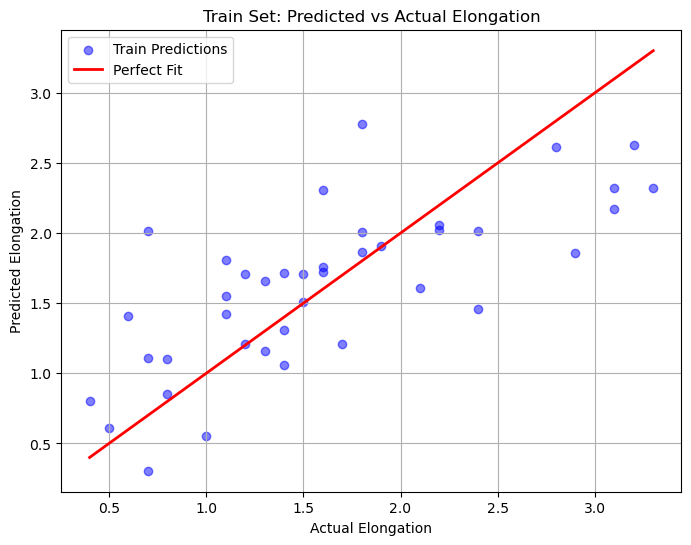

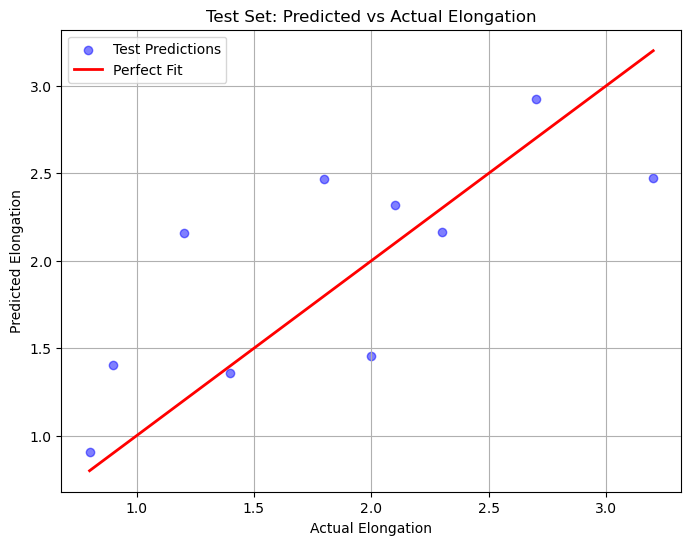

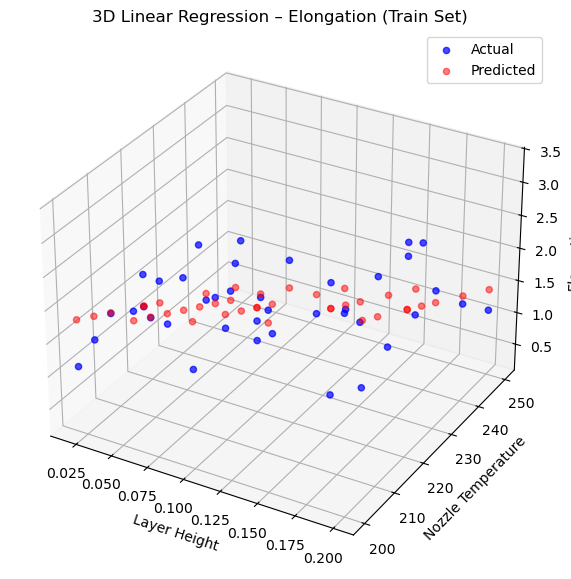

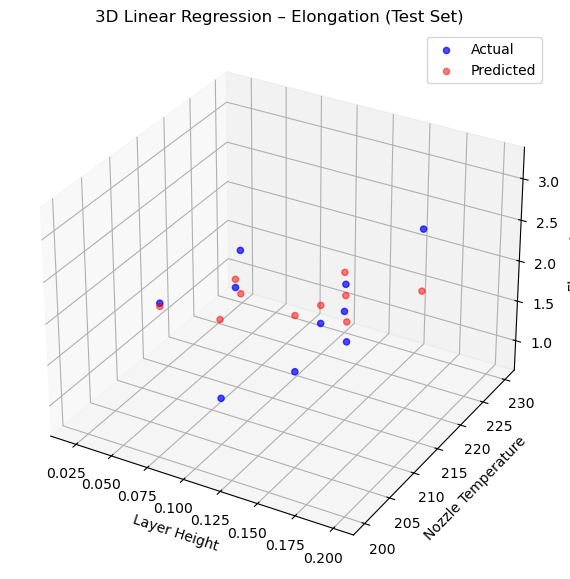

In [6]:

features = ['nozzle_temperature', 'layer_height']
X = df[features]
y = df["elongation"]

#Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

#training model
model = LinearRegression()
model.fit(X_train, y_train)

#predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#Printing
print("Linear Regression with 2 Features - Elongation")
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")

#Scatter Plots (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Train Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Train Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Test Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Test Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()

X_train_np = X_train.values
X_test_np = X_test.values

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_np[:, 1], X_train_np[:, 0], y_train.values, color='blue', label='Actual', alpha=0.7)
ax.scatter(X_train_np[:, 1], X_train_np[:, 0], y_train_pred, color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Elongation")
ax.set_title("3D Linear Regression – Elongation (Train Set)")
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_np[:, 1], X_test_np[:, 0], y_test.values, color='blue', label='Actual', alpha=0.7)
ax.scatter(X_test_np[:, 1], X_test_np[:, 0], y_test_pred, color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Elongation")
ax.set_title("3D Linear Regression – Elongation (Test Set)")
ax.legend()
plt.show()



Linear Regression with 5 Features - Elongation

Training Set:
Mean Absolute Error (MAE): 0.41
Mean Squared Error (MSE): 0.27
Root Mean Squared Error (RMSE) : 0.52
R-squared (R²): 0.55

Testing Set:
Mean Absolute Error (MAE) : 0.40
Mean Squared Error (MSE) : 0.25
Root Mean Squared Error (RMSE): 0.50
R-squared (R²) : 0.54


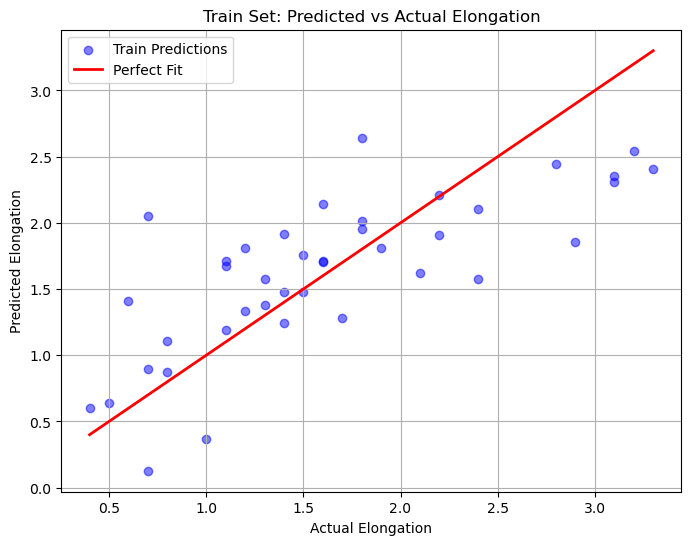

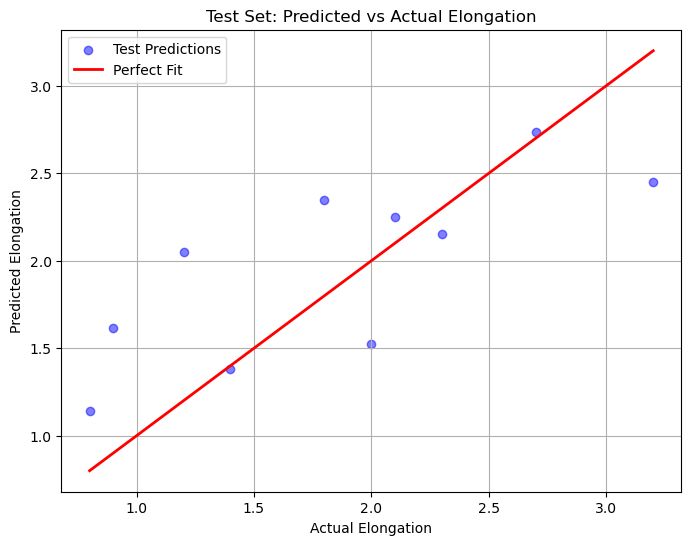

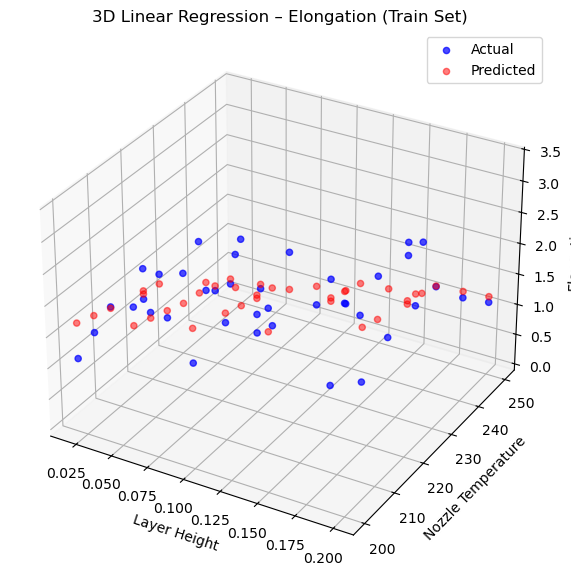

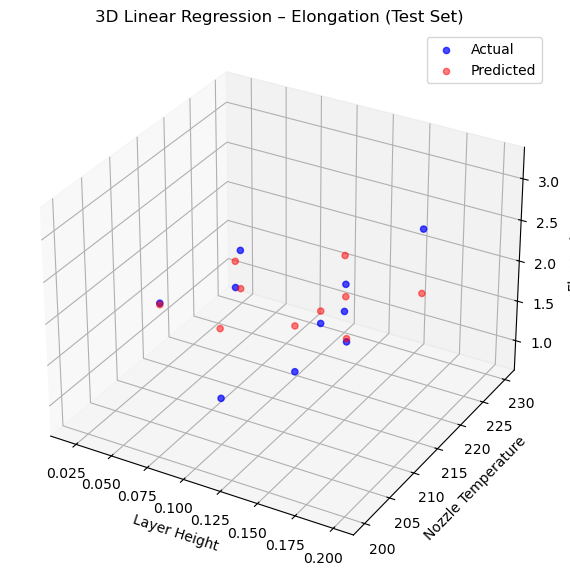

In [9]:

features = ['nozzle_temperature','layer_height','material_encoded', 'bed_temperature', 'fan_speed']
X = df[features]
y = df["elongation"]

#Splitin data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

#Training model
model = LinearRegression()
model.fit(X_train, y_train)

#Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#Printing
print("Linear Regression with 5 Features - Elongation")
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")

#Scatter Plots (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Train Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Train Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Test Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Test Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()

X_train_np = X_train.values
X_test_np = X_test.values

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_np[:, 1], X_train_np[:, 0], y_train.values, color='blue', label='Actual', alpha=0.7)
ax.scatter(X_train_np[:, 1], X_train_np[:, 0], y_train_pred, color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Elongation")
ax.set_title("3D Linear Regression – Elongation (Train Set)")
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_np[:, 1], X_test_np[:, 0], y_test.values, color='blue', label='Actual', alpha=0.7)
ax.scatter(X_test_np[:, 1], X_test_np[:, 0], y_test_pred, color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Elongation")
ax.set_title("3D Linear Regression – Elongation (Test Set)")
ax.legend()
plt.show()



Linear Regression with 6 Features - Elongation

Training Set:
Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.26
Root Mean Squared Error (RMSE) : 0.51
R-squared (R²): 0.58

Testing Set:
Mean Absolute Error (MAE) : 0.37
Mean Squared Error (MSE) : 0.18
Root Mean Squared Error (RMSE): 0.43
R-squared (R²) : 0.67


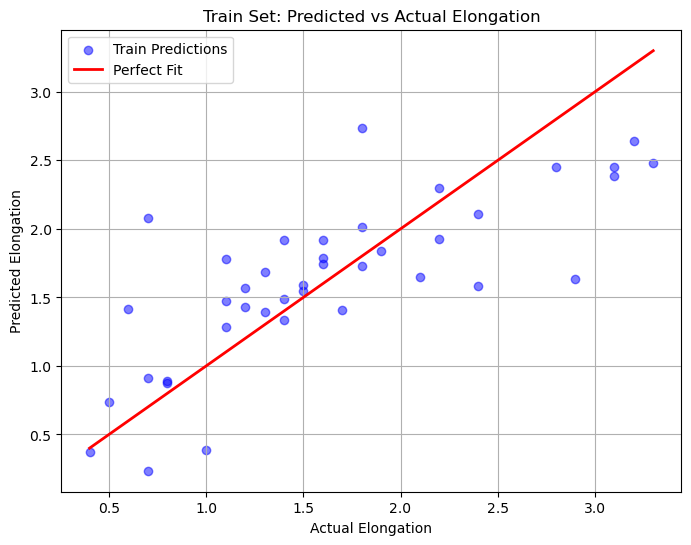

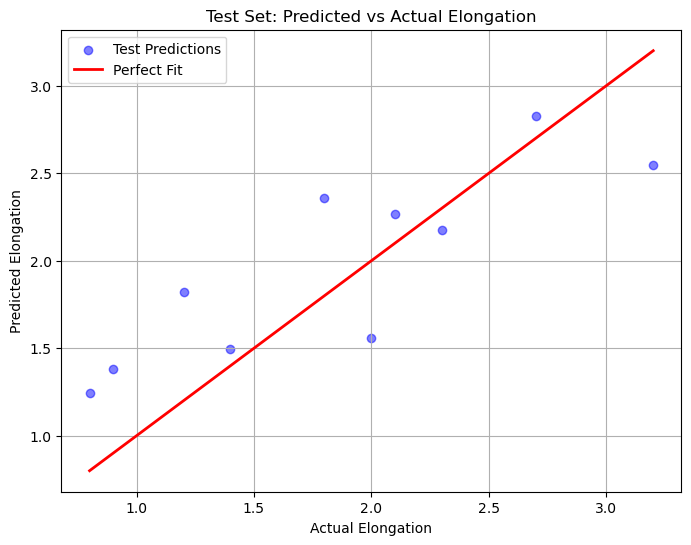

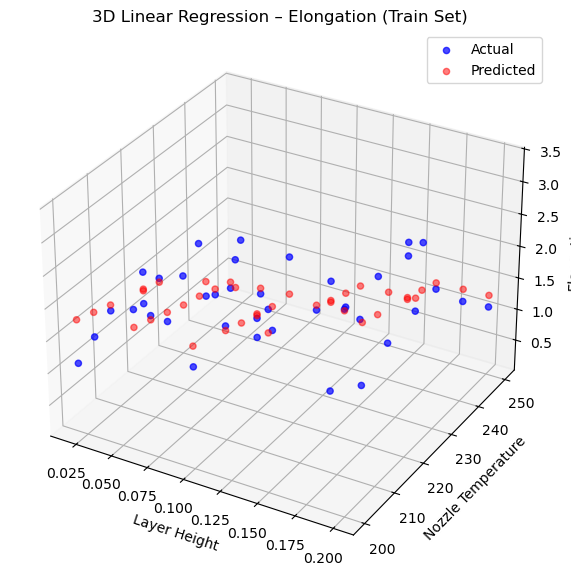

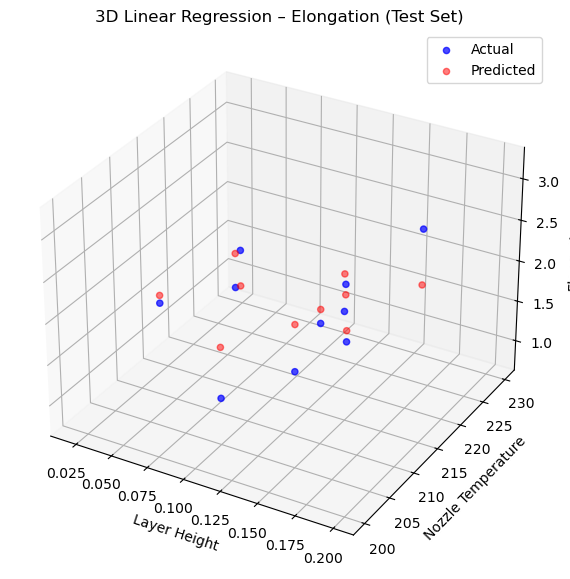

In [11]:
features = ['nozzle_temperature','layer_height','material_encoded', 'bed_temperature', 'fan_speed', 'print_speed']
X = df[features]
y = df["elongation"]

#Spliting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

#Trainiing model
model = LinearRegression()
model.fit(X_train, y_train)

#Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

#Evaluation
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

#Printing
print("Linear Regression with 6 Features - Elongation")
print("\nTraining Set:")
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")

#Scatter Plots (Actual vs Predicted)
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Train Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Train Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Test Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Test Set: Predicted vs Actual Elongation")
plt.grid(True)
plt.legend()
plt.show()

X_train_np = X_train.values
X_test_np = X_test.values

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_np[:, 1], X_train_np[:, 0], y_train.values, color='blue', label='Actual', alpha=0.7)
ax.scatter(X_train_np[:, 1], X_train_np[:, 0], y_train_pred, color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Elongation")
ax.set_title("3D Linear Regression – Elongation (Train Set)")
ax.legend()
plt.show()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test_np[:, 1], X_test_np[:, 0], y_test.values, color='blue', label='Actual', alpha=0.7)
ax.scatter(X_test_np[:, 1], X_test_np[:, 0], y_test_pred, color='red', label='Predicted', alpha=0.5)
ax.set_xlabel("Layer Height")
ax.set_ylabel("Nozzle Temperature")
ax.set_zlabel("Elongation")
ax.set_title("3D Linear Regression – Elongation (Test Set)")
ax.legend()
plt.show()


Polynomial Regression -Eongation- 2nd Degree 5 Features with library

Training Set:
Mean Absolute Error (MAE): 0.33
Mean Squared Error (MSE): 0.20
Root Mean Squared Error (RMSE) : 0.45
R-squared (R²): 0.67

Testing Set:
Mean Absolute Error (MAE) : 0.34
Mean Squared Error (MSE) : 0.15
Root Mean Squared Error (RMSE): 0.39
R-squared (R²) : 0.73


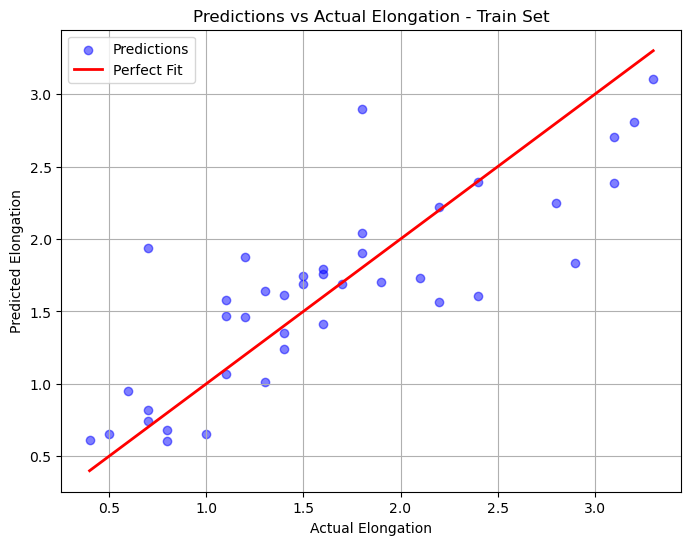

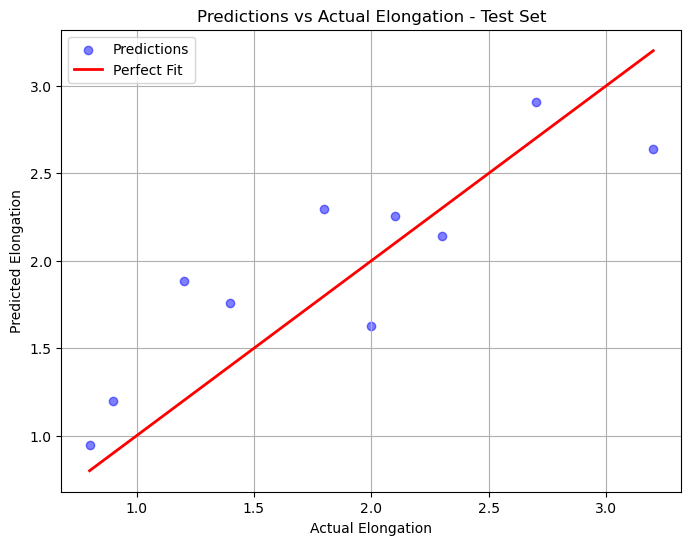

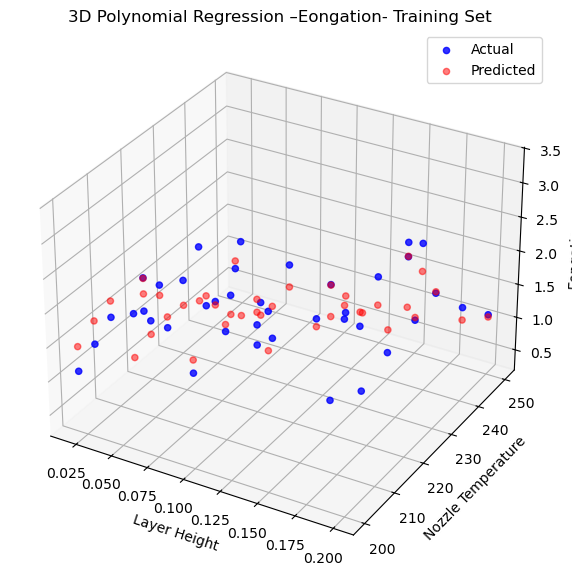

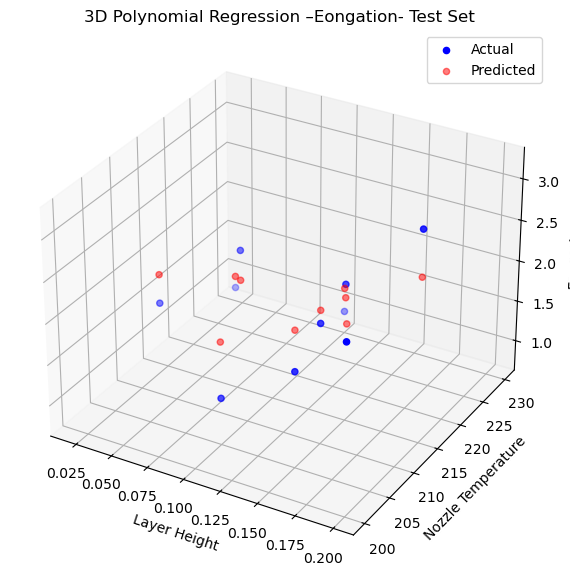

In [18]:
features = ['nozzle_temperature','layer_height','material_encoded', 'bed_temperature', 'fan_speed']
X = df[features]
y = df["elongation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

poly = PolynomialFeatures(degree=2) #Creating a polynomial regression, dependent on 2 features 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)

#Doing the model predictions 
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print(f"Polynomial Regression -Eongation- 2nd Degree 5 Features with library")#Evaluation of a model 
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\nTraining Set:")#printing the evaluations 
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#plot Predictions vs Actuals


plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.grid(True)
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Predictions vs Actual Elongation - Train Set")
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.grid(True)
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Predictions vs Actual Elongation - Test Set")
plt.legend()
plt.show()




#initialising the 3d plot for training set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
# Actual values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
# Predicted values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')#labelling 
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Eongation')
ax.set_title("3D Polynomial Regression –Eongation- Training Set")
ax.legend()
plt.show()

#initialising the 3d plot for testing set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test, color='blue', label='Actual')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Eongation')
ax.set_title("3D Polynomial Regression –Eongation- Test Set")
ax.legend()
plt.show()

Polynomial Regression 2nd Degree 6 Features with library

Training Set:
Mean Absolute Error (MAE): 0.26
Mean Squared Error (MSE): 0.14
Root Mean Squared Error (RMSE) : 0.38
R-squared (R²): 0.77

Testing Set:
Mean Absolute Error (MAE) : 0.28
Mean Squared Error (MSE) : 0.13
Root Mean Squared Error (RMSE): 0.37
R-squared (R²) : 0.75


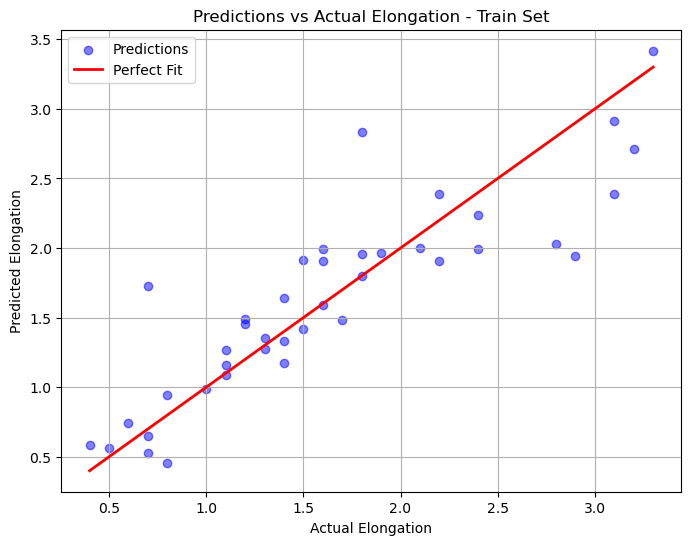

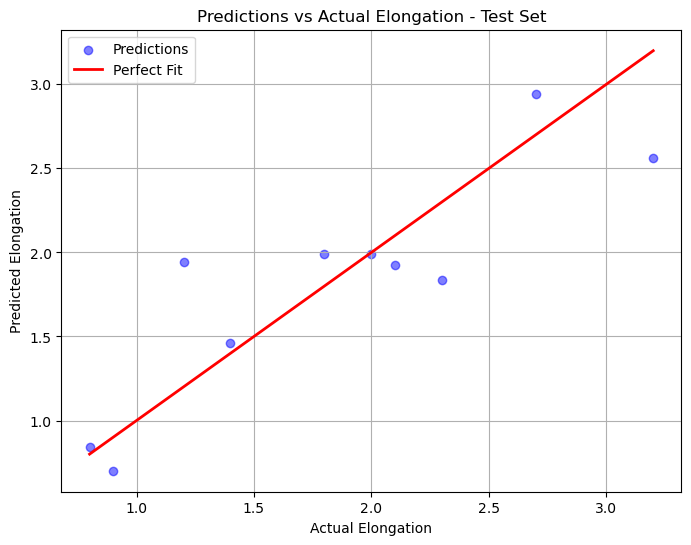

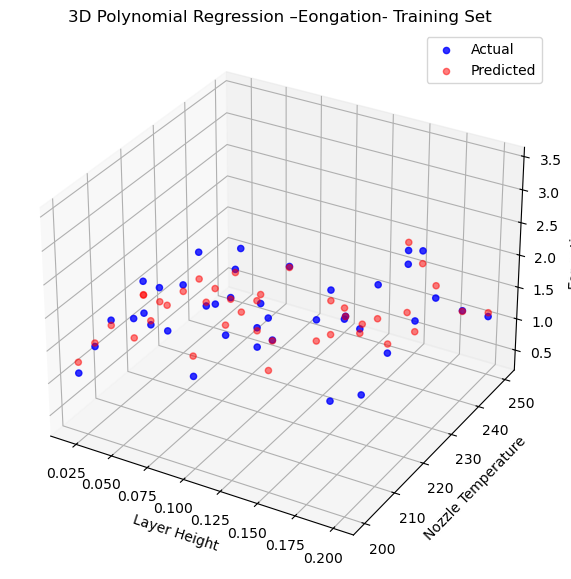

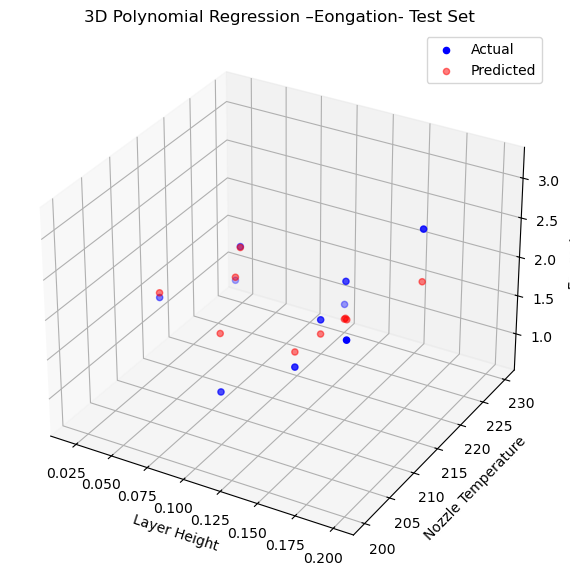

In [10]:
features = ['nozzle_temperature','layer_height','material_encoded', 'bed_temperature', 'fan_speed', 'print_speed']
X = df[features]
y = df["elongation"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

poly = PolynomialFeatures(degree=2) #Creating a polynomial Linear regression, dependent on 2 features 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)

#Doing the model predictions 
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print(f"Polynomial Regression 2nd Degree 6 Features with library")#Evaluation of a model 
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\nTraining Set:")#printing the evaluations 
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#plotting Predictions vs Actuals

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.grid(True)
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Predictions vs Actual Elongation - Train Set")
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.grid(True)
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Predictions vs Actual Elongation - Test Set")
plt.legend()
plt.show()



#initialising the 3d plot for training set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
# Actual values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
# Predicted values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')#labelling 
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Eongation')
ax.set_title("3D Polynomial Regression –Eongation- Training Set")
ax.legend()
plt.show()

#initialising the 3d plot for testing set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test, color='blue', label='Actual')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Eongation')
ax.set_title("3D Polynomial Regression –Eongation- Test Set")
ax.legend()
plt.show()

Polynomial Regression 2nd Degree 2 -Eongation- Features with library

Training Set:
Mean Absolute Error (MAE): 0.36
Mean Squared Error (MSE): 0.24
Root Mean Squared Error (RMSE) : 0.49
R-squared (R²): 0.61

Testing Set:
Mean Absolute Error (MAE) : 0.40
Mean Squared Error (MSE) : 0.19
Root Mean Squared Error (RMSE): 0.43
R-squared (R²) : 0.65


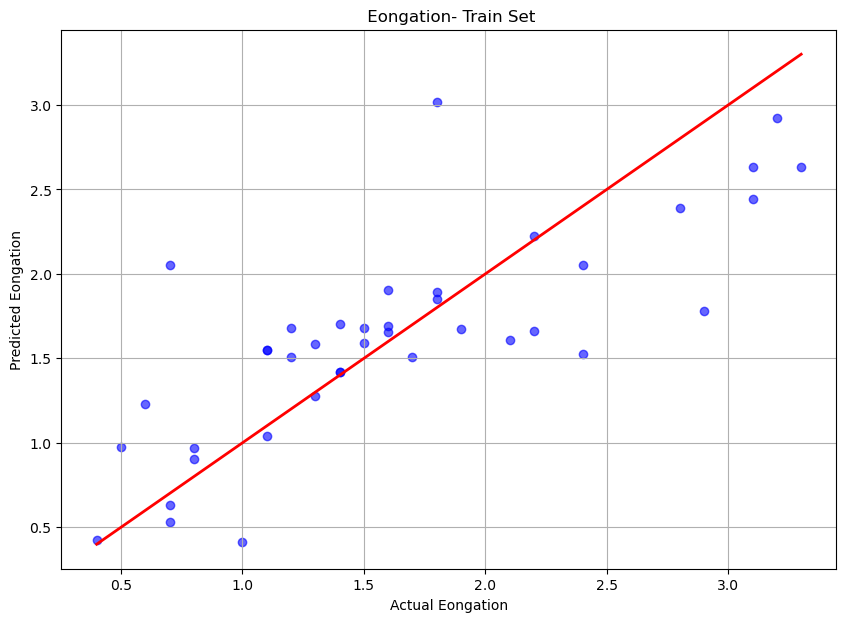

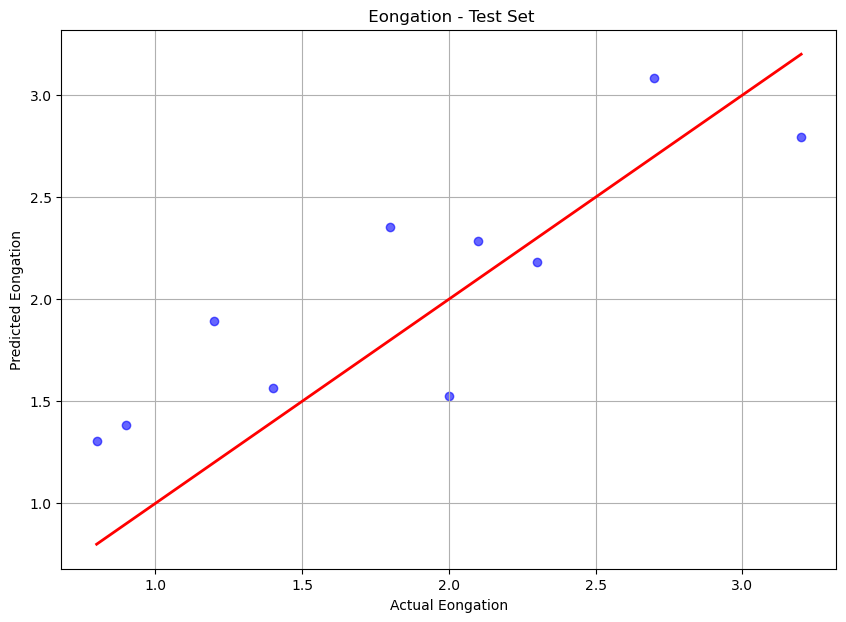

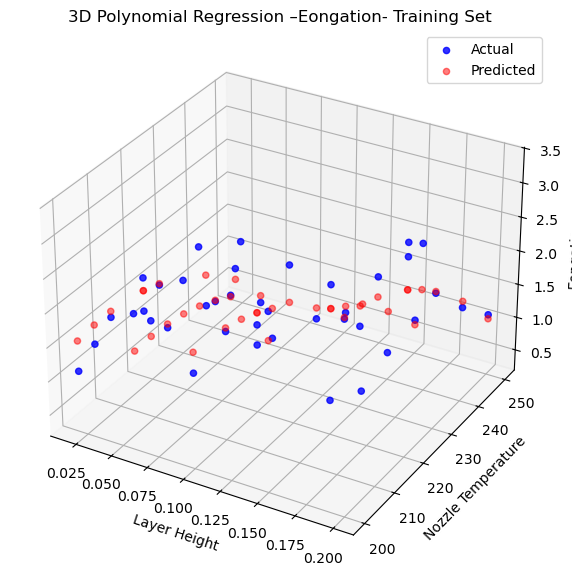

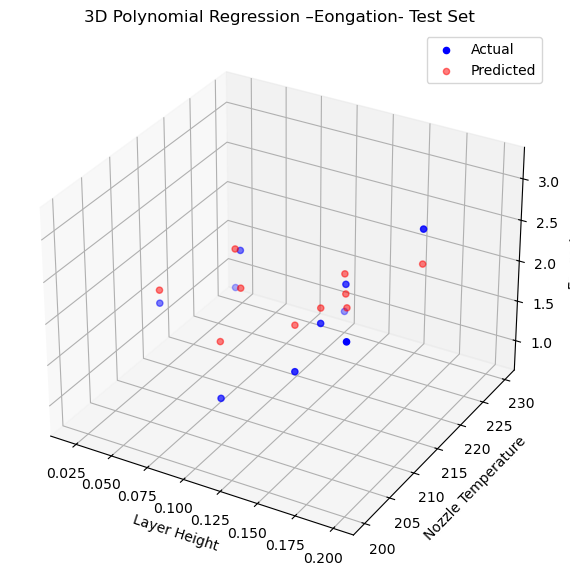

In [14]:

features = ['nozzle_temperature','layer_height']
X = df[features]
y = df["elongation"]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

poly = PolynomialFeatures(degree=2) #Creating a polynomial regression, dependent on 2 features 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)

#Doing the model predictions 
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print(f"Polynomial Regression 2nd Degree 2 -Eongation- Features with library")#Evaluation of a model 
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\nTraining Set:")#printing the evaluations 
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#Plot Predictions vs Actuals
plt.figure(figsize=(10, 7))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Eongation")
plt.ylabel("Predicted Eongation")
plt.title(" Eongation- Train Set")
plt.grid(True)
plt.show()

#Plot Predictions vs Actuals
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Eongation")
plt.ylabel("Predicted Eongation")
plt.title(" Eongation - Test Set")
plt.grid(True)
plt.show()


#initialising the 3d plot for training set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
# Actual values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
# Predicted values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')#labelling 
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Eongation')
ax.set_title("3D Polynomial Regression –Eongation- Training Set")
ax.legend()
plt.show()

#initialising the 3d plot for testing set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test, color='blue', label='Actual')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Eongation')
ax.set_title("3D Polynomial Regression –Eongation- Test Set")
ax.legend()
plt.show()

Polynomial Regression -Eongation- 3rd Degree 2 Features with library

Training Set:
Mean Absolute Error (MAE): 0.32
Mean Squared Error (MSE): 0.18
Root Mean Squared Error (RMSE) : 0.43
R-squared (R²): 0.70

Testing Set:
Mean Absolute Error (MAE) : 0.28
Mean Squared Error (MSE) : 0.13
Root Mean Squared Error (RMSE): 0.36
R-squared (R²) : 0.77


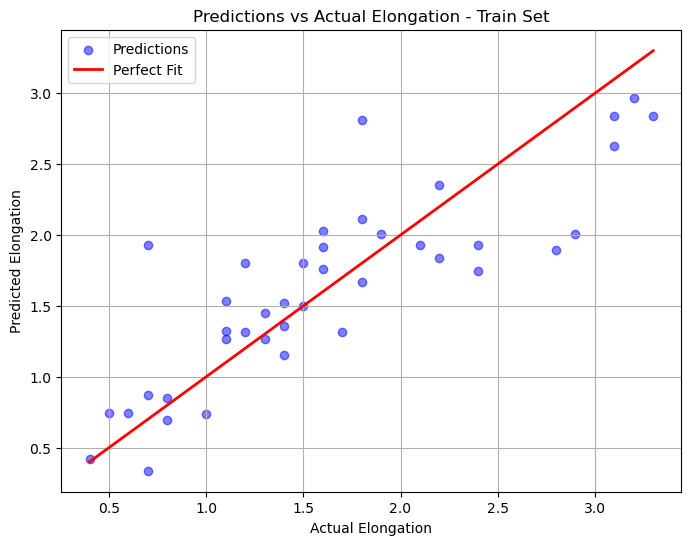

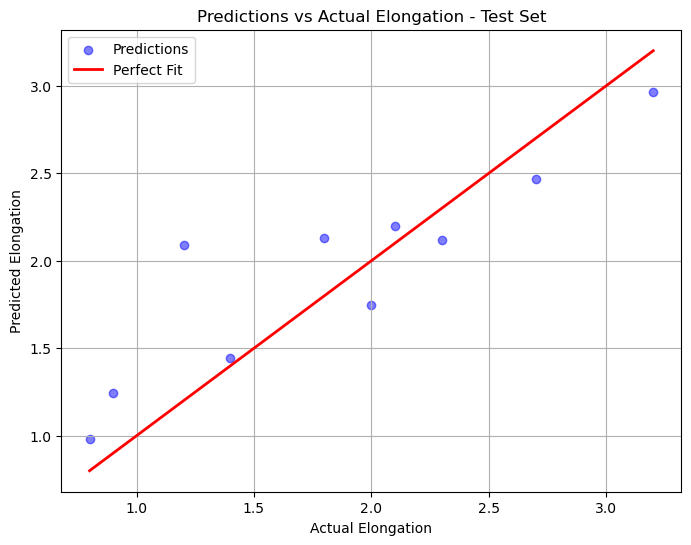

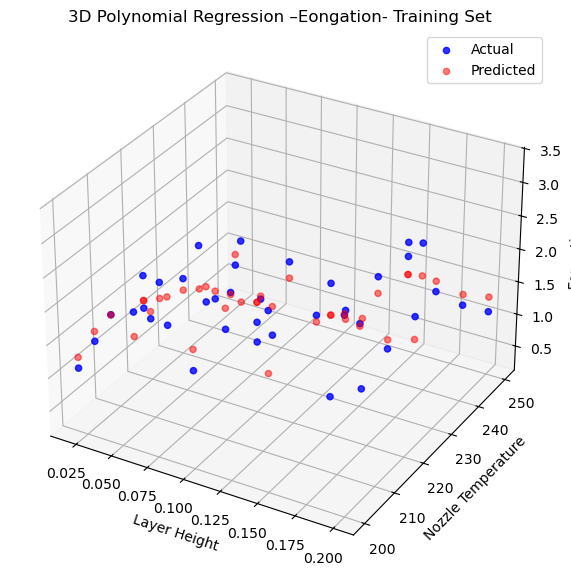

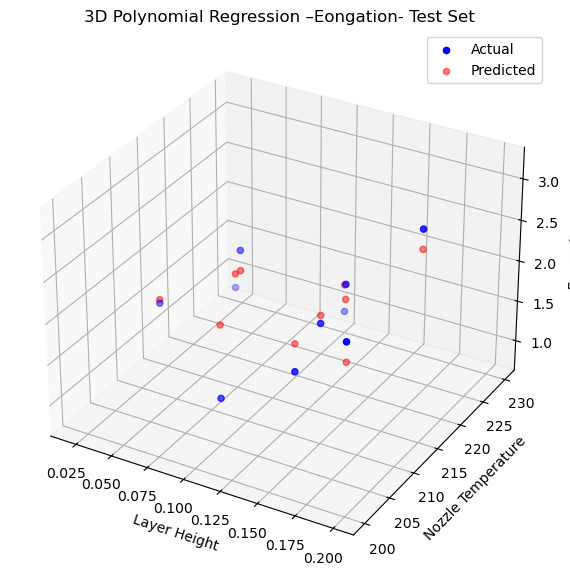

In [9]:
features = ['nozzle_temperature', 'layer_height']
X = df[features]
y = df["elongation"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

poly = PolynomialFeatures(degree=3) #Creating a polynomial regression, dependent on 2 features 
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


model = LinearRegression()
model.fit(X_train_poly, y_train)

#Doing the model predictions 
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)

print(f"Polynomial Regression -Eongation- 3rd Degree 2 Features with library")#Evaluation of a model 
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\nTraining Set:")#printing the evaluations 
print(f"Mean Absolute Error (MAE): {mae_train:.2f}")
print(f"Mean Squared Error (MSE): {mse_train:.2f}")
print(f"Root Mean Squared Error (RMSE) : {rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")

mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nTesting Set:")
print(f"Mean Absolute Error (MAE) : {mae_test:.2f}")
print(f"Mean Squared Error (MSE) : {mse_test:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_test:.2f}")
print(f"R-squared (R²) : {r2_test:.2f}")


#plot Predictions vs Actuals


plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r-', lw=2, label="Perfect Fit")
plt.grid(True)
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Predictions vs Actual Elongation - Train Set")
plt.legend()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label="Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r-', lw=2, label="Perfect Fit")
plt.grid(True)
plt.xlabel("Actual Elongation")
plt.ylabel("Predicted Elongation")
plt.title("Predictions vs Actual Elongation - Test Set")
plt.legend()
plt.show()




#initialising the 3d plot for training set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
# Actual values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train, color='blue', alpha=0.8, label='Actual')
# Predicted values in the training set
ax.scatter(X_train['layer_height'], X_train['nozzle_temperature'], y_train_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')#labelling 
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Eongation')
ax.set_title("3D Polynomial Regression –Eongation- Training Set")
ax.legend()
plt.show()

#initialising the 3d plot for testing set 
fig = plt.figure(figsize=(10, 7))
ax = plt.axes(projection='3d')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test, color='blue', label='Actual')
ax.scatter(X_test['layer_height'], X_test['nozzle_temperature'], y_test_pred, color='red', alpha=0.5, label='Predicted')
ax.set_xlabel('Layer Height')
ax.set_ylabel('Nozzle Temperature')
ax.set_zlabel('Eongation')
ax.set_title("3D Polynomial Regression –Eongation- Test Set")
ax.legend()
plt.show()